In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as pp
import cmocean.cm as cmo
import matplotlib.colors as mc
import seaborn as sb


In [2]:
pp.style.use('ggplot')

In [3]:
λ = [411, 443, 489, 510, 555, 670]

In [4]:
project_path = Path.cwd()
data_path = project_path / 'data' / '04_transformed'
assert data_path.exists()

In [10]:
image_path = project_path / 'manuscript' / 'images'

In [5]:
df = pd.read_parquet(data_path / 'df_all.pqt')

For EDA purposes, I will drop all rows with NaN.

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1212
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1082 non-null   int64  
 1   lat                1082 non-null   float64
 2   lon                1082 non-null   float64
 3   etopo2             1082 non-null   float64
 4   oisst              1082 non-null   float64
 5   Rrs411             1082 non-null   float64
 6   Rrs443             1082 non-null   float64
 7   Rrs489             1082 non-null   float64
 8   Rrs510             1082 non-null   float64
 9   Rrs555             1082 non-null   float64
 10  Rrs670             1082 non-null   float64
 11  MBR                1082 non-null   float64
 12  log_MBR            1082 non-null   float64
 13  MBR_flag           1082 non-null   object 
 14  chl                1082 non-null   float64
 15  max_band_all_flag  1082 non-null   object 
 16  log_chl            1082 non-n

<Axes: >

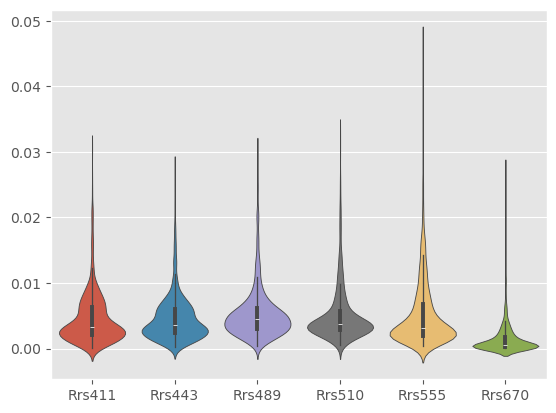

In [7]:
sb.violinplot(df.filter(regex='Rrs[0-9]+'))

All Rrs data is roughly on the same scale

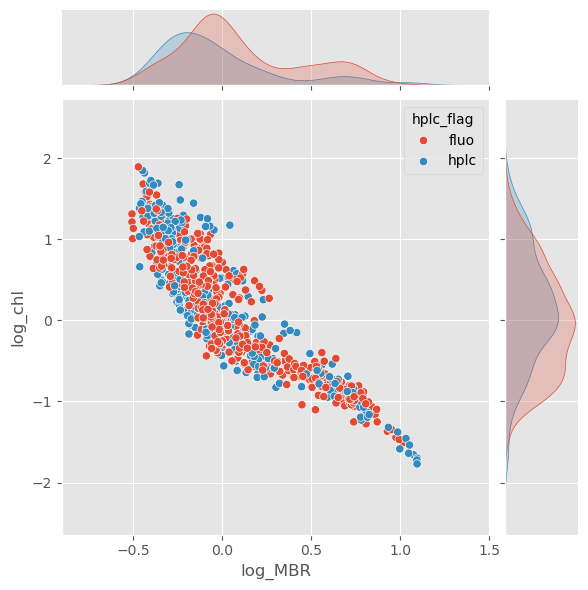

In [8]:
sb.jointplot(
    df, x='log_MBR', y='log_chl', hue='hplc_flag',  dropna=True)

In [9]:
wavelength_colors = {
    '411': mc.to_rgb('indigo'),  # Approximate color for 411 nm
    '443': mc.to_rgb('blue'),       # Approximate color for 443 nm
    '489': mc.to_rgb('cyan'),       # Approximate color for 489 nm
    '510': mc.to_rgb('green')        # Approximate color for 510 nm
}
wavelengths= [f'{i}' for i in wavelength_colors.keys()]
# Create a custom palette mapping wavelengths to colors
palette = [wavelength_colors[w] for w in np.unique(wavelengths)]
hue_order = [f'Rrs{i}' for i in wavelengths]

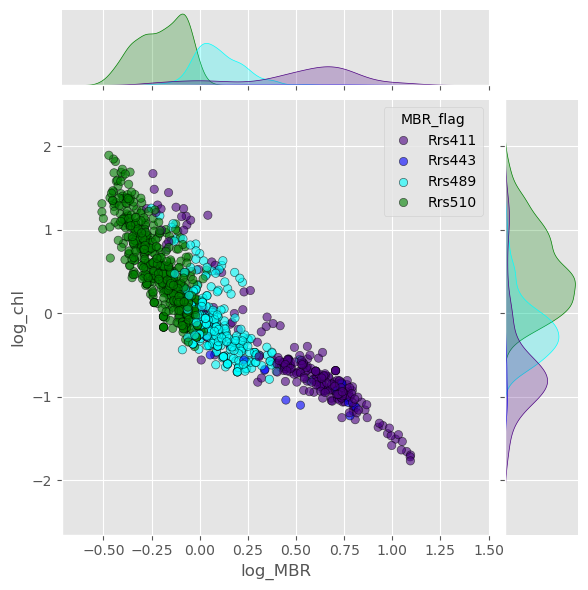

In [13]:
sb.jointplot(
    df, x='log_MBR', y='log_chl', hue='MBR_flag', 
    hue_order=['Rrs411', 'Rrs443', 'Rrs489', 'Rrs510'], palette=palette,
        joint_kws={'alpha': 0.6, 'edgecolor': 'k'}    # dropna=True, 
    )
f = pp.gcf()
f.savefig(image_path / 'eda_numerator.png', dpi=300)
f.savefig(image_path / 'eda_numerator.pdf', dpi=300)

In [16]:
hplc_colors = {
    'hplc': mc.to_rgb('red'),  # Approximate color for 411 nm
    'fluo': mc.to_rgb('black'),       # Approximate color for 510 nm
}
colors= [f'{i}' for i in hplc_colors.keys()]
# Create a custom palette mapping wavelengths to colors
palette = [hplc_colors[w] for w in np.unique(colors)]

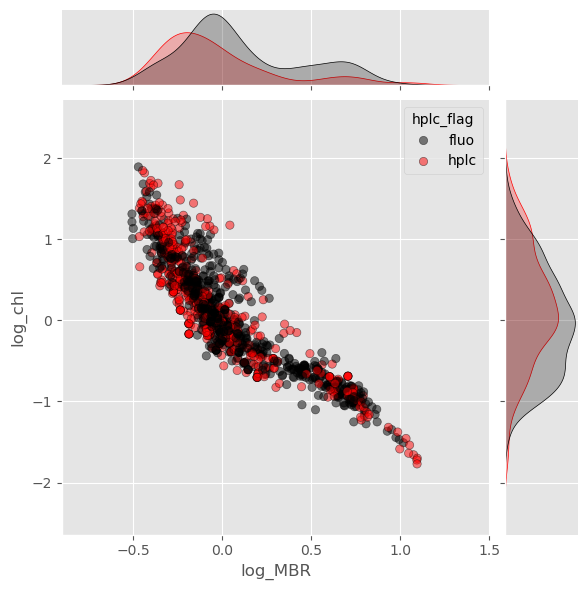

In [18]:
sb.jointplot(
    df, x='log_MBR', y='log_chl', hue='hplc_flag', palette=palette,
        joint_kws={'alpha': 0.5, 'edgecolor': 'k'}    # dropna=True, 
    )
f = pp.gcf()
f.savefig(image_path / 'eda_hplc.png', dpi=300)
f.savefig(image_path / 'eda_hplc.pdf', dpi=300)

In [58]:
wavelength_colors = {
    '411': mc.to_rgb('indigo'),  # Approximate color for 411 nm
    '443': mc.to_rgb('blue'),       # Approximate color for 443 nm
    '489': mc.to_rgb('cyan'),       # Approximate color for 489 nm
    '510': mc.to_rgb('green'),        # Approximate color for 510 nm
    '555': mc.to_rgb('orange'),
    '670': mc.to_rgb('red')
}
wavelengths= [f'{i}' for i in wavelength_colors.keys()]
# Create a custom palette mapping wavelengths to colors
palette = [wavelength_colors[w] for w in np.unique(wavelengths)]
hue_order = [f'Rrs{i}' for i in wavelengths]

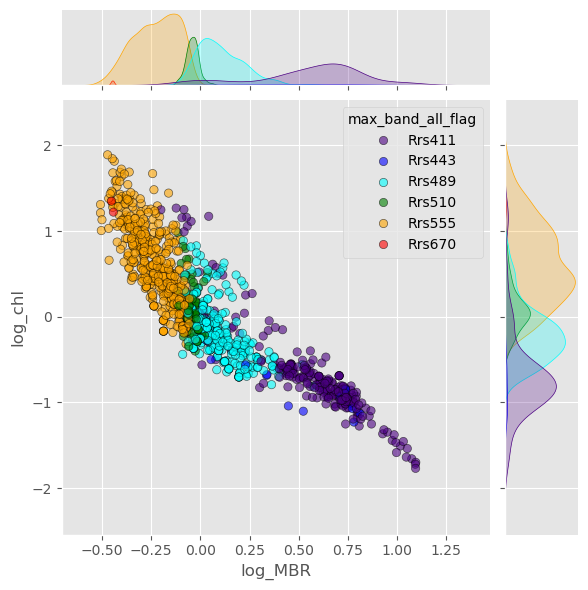

In [59]:
sb.jointplot(
    df, x='log_MBR', y='log_chl', hue='max_band_all_flag', 
    hue_order=hue_order, palette=palette,
        joint_kws={'alpha': 0.6, 'edgecolor': 'k'}    # dropna=True, 
    )

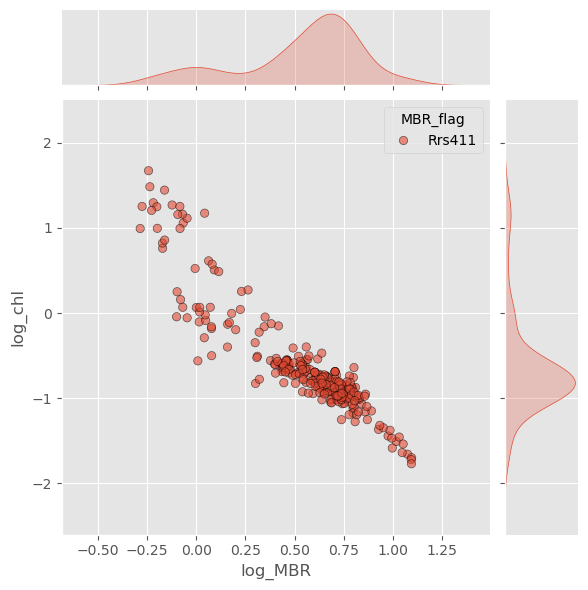

In [32]:
flag='Rrs411'
sb.jointplot(
    df.loc[df.MBR_flag==flag], x='log_MBR', y='log_chl', hue='MBR_flag', 
        joint_kws={'alpha': 0.6, 'edgecolor': 'k'}    # dropna=True, 
    )

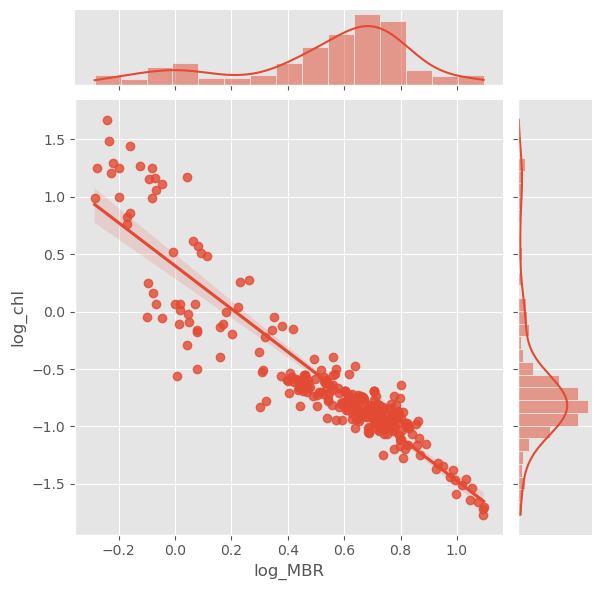

In [33]:
flag='Rrs411'
sb.jointplot(
    df.loc[df.MBR_flag==flag], x='log_MBR', y='log_chl', #hue='MBR_flag', 
        #joint_kws={'alpha': 0.6, 'edgecolor': 'k'},    # dropna=True, 
        kind='reg'
    )

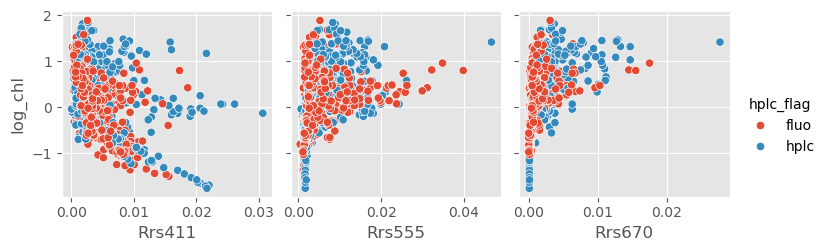

In [34]:
sb.pairplot(
    df.dropna(), x_vars=[f'Rrs{i}' for i in [411, 555, 670]],
      y_vars='log_chl', hue='hplc_flag')

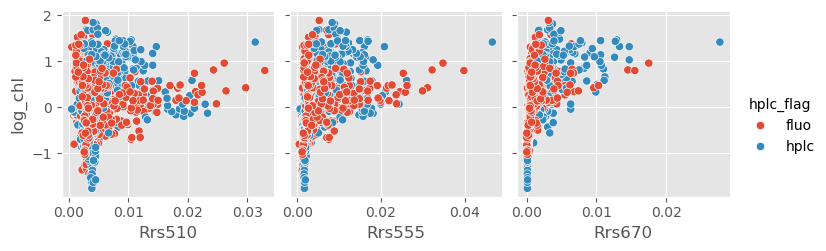

In [35]:
sb.pairplot(
    df.dropna(), x_vars=[f'Rrs{i}' for i in [510, 555, 670, ]],
      y_vars='log_chl', hue='hplc_flag')

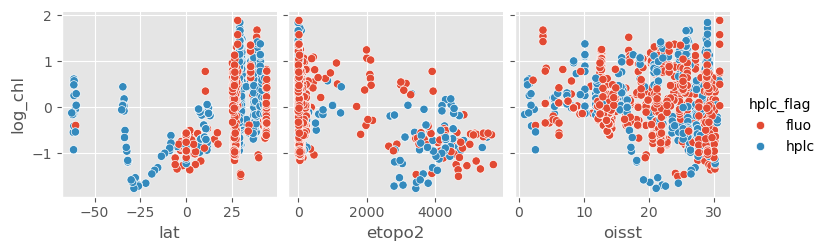

In [36]:
sb.pairplot(
    df.dropna(), x_vars=['lat', 'etopo2', 'oisst'],
      y_vars='log_chl', hue='hplc_flag')

In [37]:
def plot_triu_heatmap(df: pd.DataFrame, vmin=-1, vmax=1):
    feature_nums = df.shape[1]
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = pp.subplots()
    sb.heatmap(df, mask=mask, ax=ax, vmin=-vmin, vmax=vmax)
    ax.set_xlim(0, feature_nums-1)
    ax.set_ylim(feature_nums, 1)

In [38]:
drop_cols = ['id', 'hplc_flag', 'MBR_flag']
geo_features= ['lat', 'lon']
geophys_features = ['etopo2', 'oisst']
color_features = [f'Rrs{i}' for i in λ]
mbr_features = ['MBR', 'log_MBR']
chl_features = ['chl','log_chl']

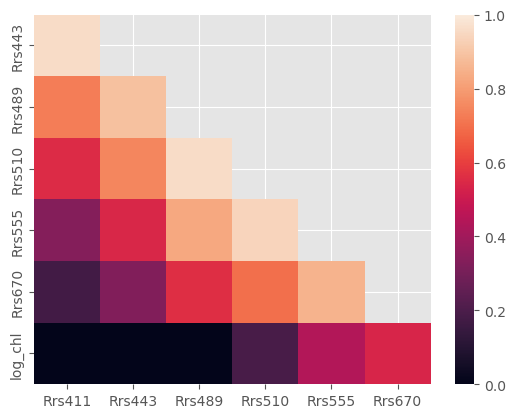

In [46]:
color_corr = df[color_features + [chl_features[1]]].corr()
plot_triu_heatmap(color_corr, vmin=0, vmax=1)

<Axes: xlabel='Rrs555', ylabel='Rrs670'>

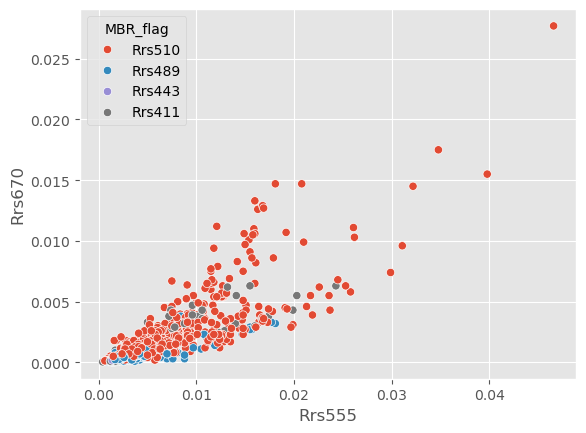

In [12]:

sb.scatterplot(
    df, x='Rrs555', y='Rrs670', hue='MBR_flag'
    )

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

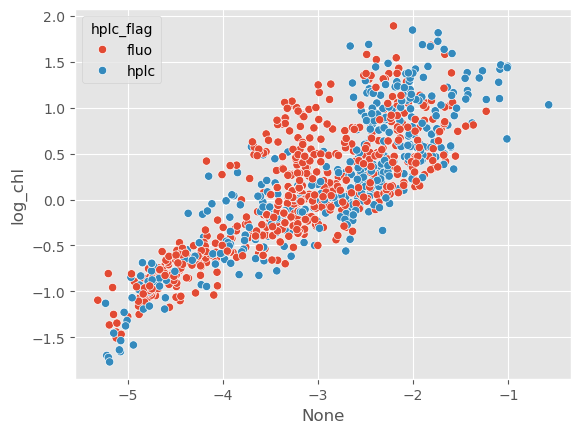

In [57]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs411), 
    y=df.log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

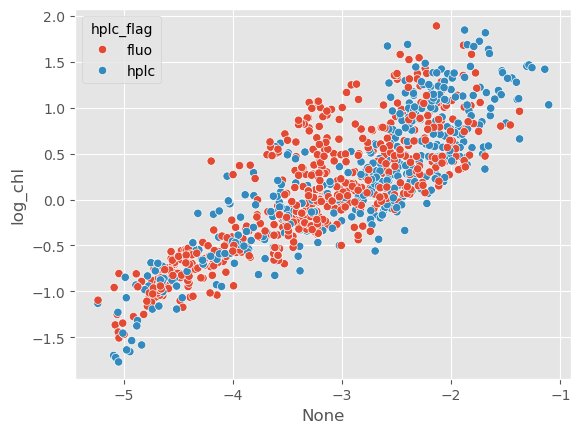

In [56]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs443), 
    y=df.log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='chl'>

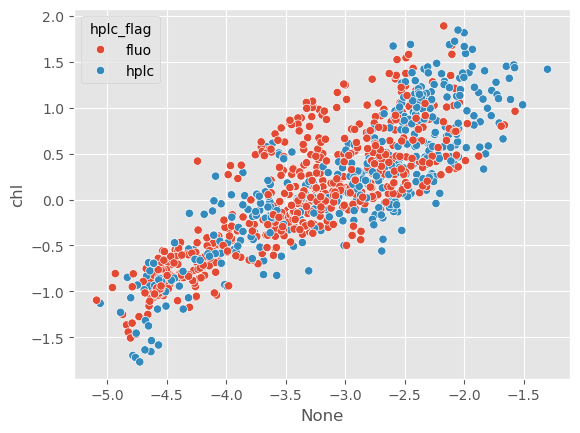

In [66]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489), 
    y=np.log10(df.dropna().chl), 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

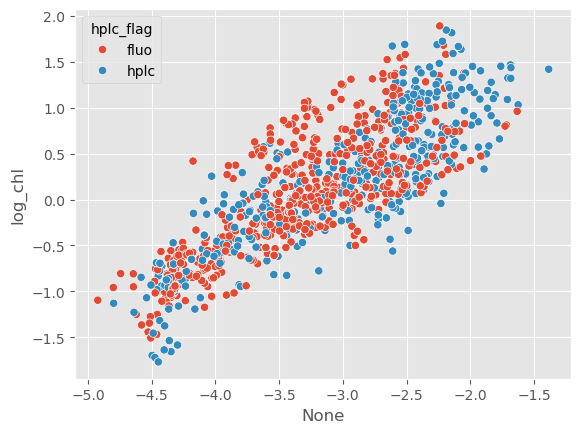

In [64]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs510), 
    y=df.log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

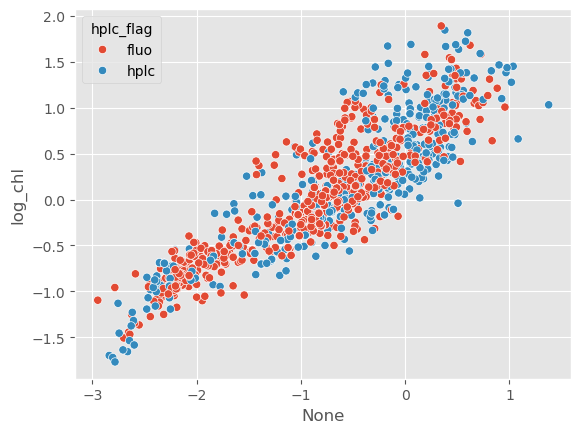

In [62]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs510*df.dropna().Rrs411), 
    y=df.log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

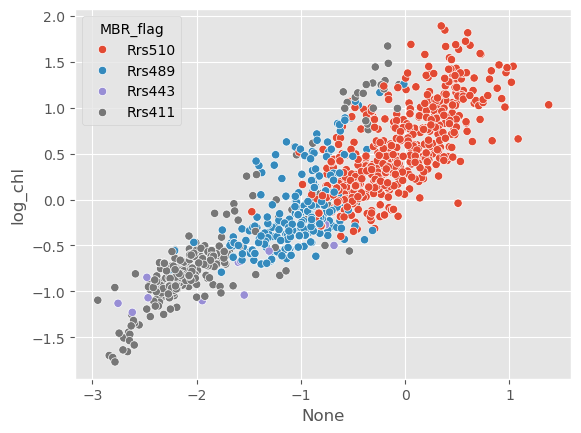

In [81]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs510*df.dropna().Rrs411), 
    y=df.log_chl, 
    hue=df.dropna().MBR_flag)

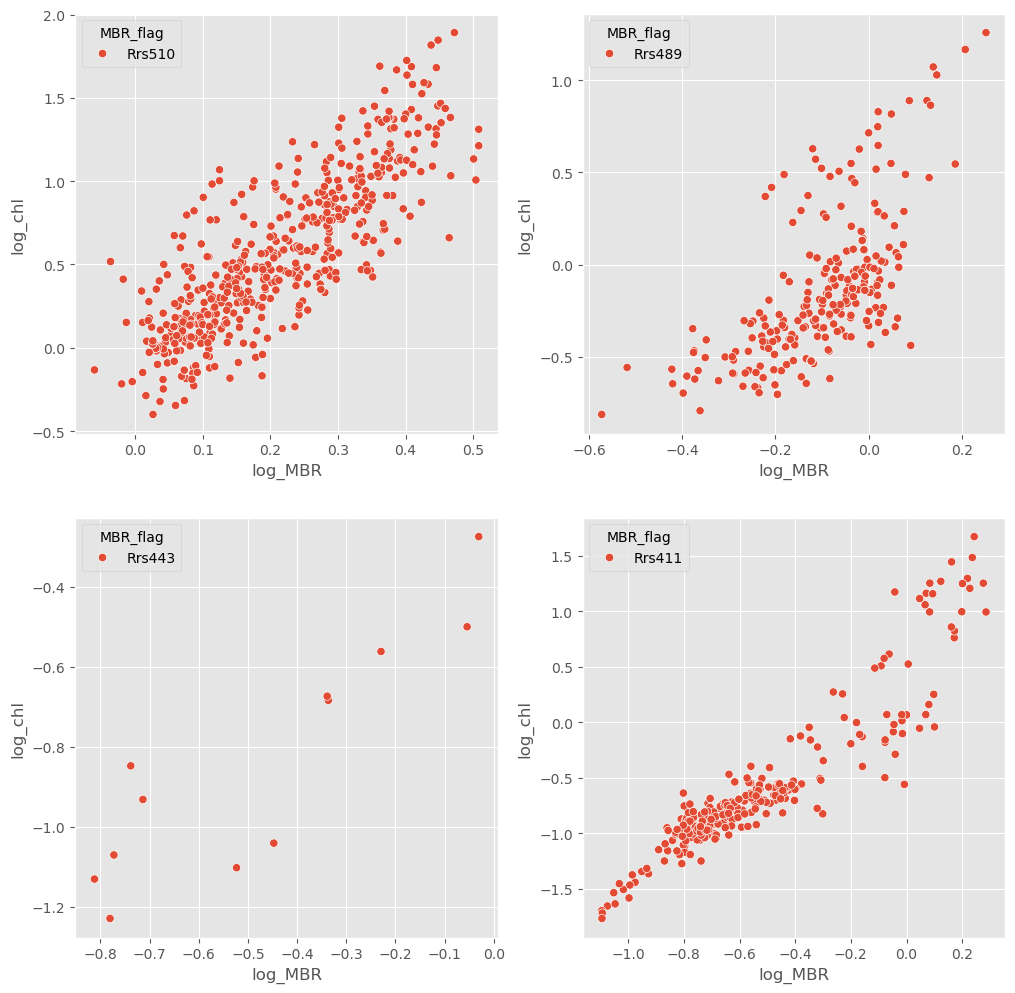

In [ ]:
f, axs = pp.subplots(2, 2, figsize=(12, 12))
for i, (ax, flag) in enumerate(zip(axs.ravel(), df.MBR_flag.unique())):
    sb.scatterplot(
        x = -df.loc[df.MBR_flag==flag].dropna().log_MBR,
        y = df.loc[df.MBR_flag==flag].dropna().log_chl,
        hue=df.loc[df.MBR_flag==flag].dropna().MBR_flag, ax=ax)
    


(-2.0, 2.0)

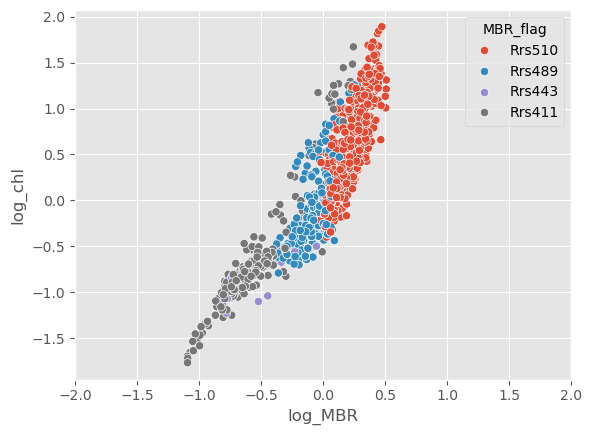

In [60]:
sb.scatterplot(
    x= - df.log_MBR, 
    y=df.log_chl, 
    hue=df.MBR_flag)
pp.xlim(-2, 2)

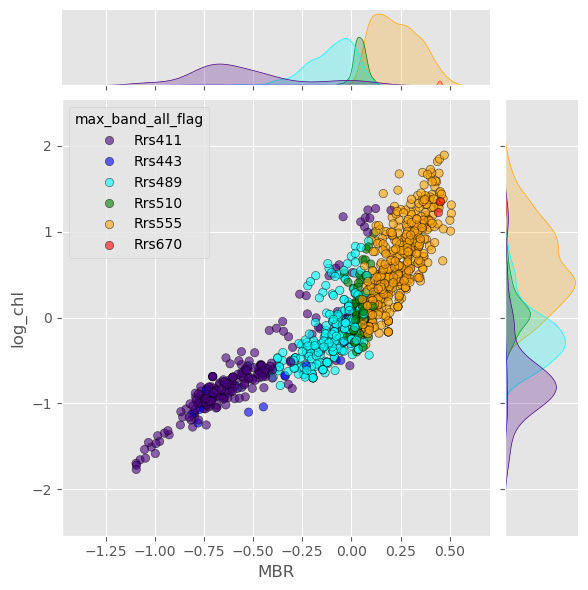

In [61]:
sb.jointplot(
    x= np.log10(1/df.MBR), 
    y=df.log_chl, 
    hue=df.max_band_all_flag, 
    hue_order=hue_order, palette=palette,
        joint_kws={'alpha': 0.6, 'edgecolor': 'k'}    # dropna=True, 
)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

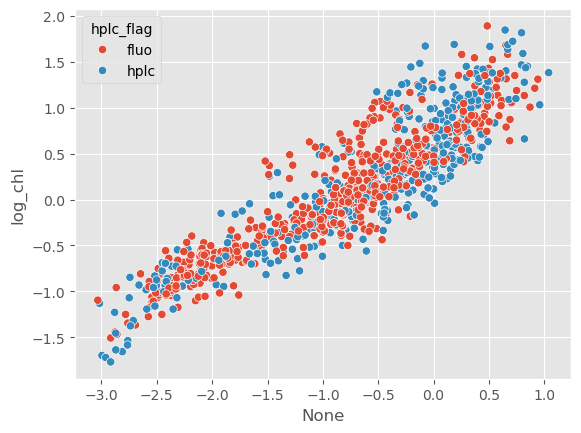

In [68]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

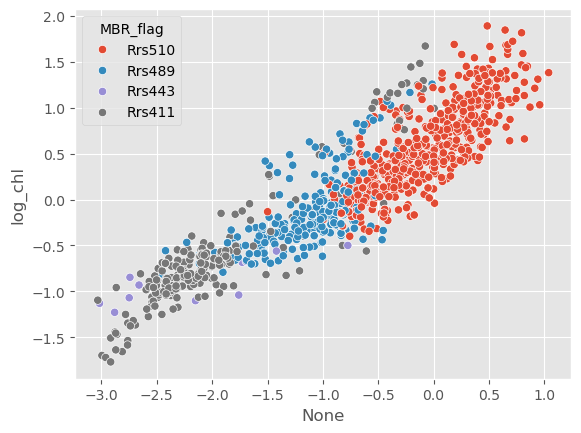

In [99]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

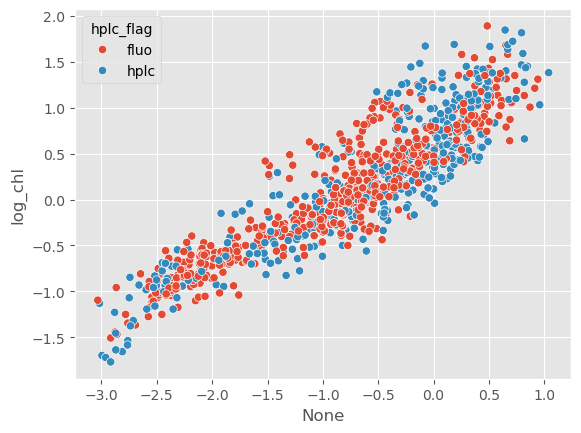

In [69]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

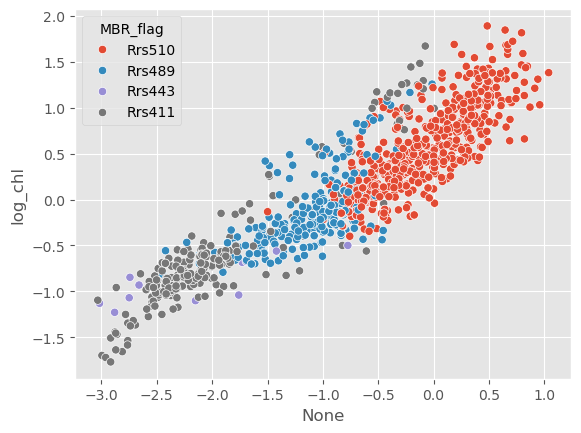

In [100]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

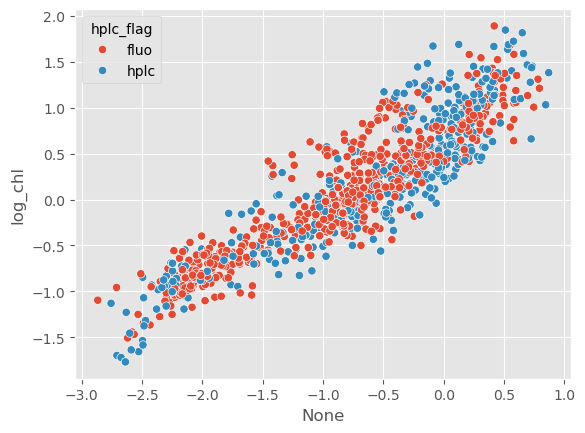

In [70]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs510*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

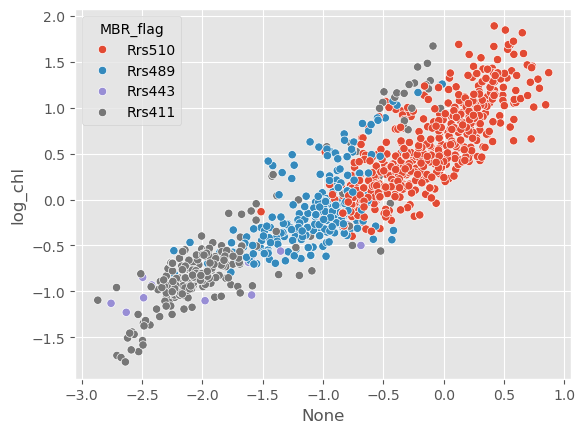

In [101]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs510*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

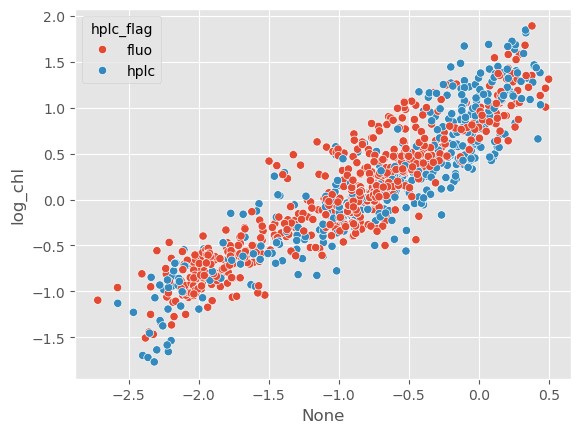

In [71]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs510), 
    y=df.dropna().log_chl, 
    hue=df.dropna().hplc_flag)

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

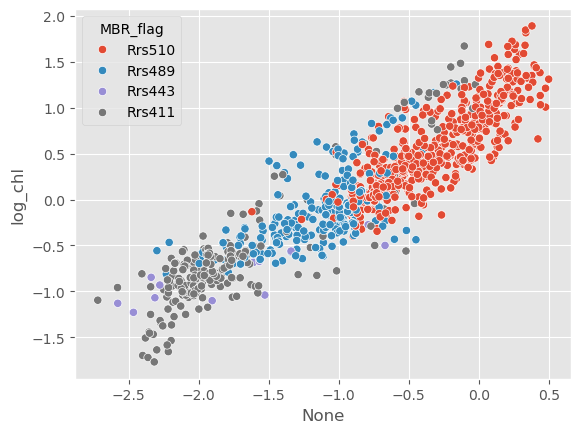

In [102]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs510), 
    y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

A note: we might be tempted to impose a functional form like a polynomial based on the perceived shape of a scatterplot. This could very well be an artifact of the sample at hand, and should not be assumed to be representative. We should remember this is just a sample and should reason mechanistically to find a model that makes sense, even at the cost of a poorer fit to the sample at hand. Model development should follow development of understanding and the incorporation of sound principles. 

/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='None', ylabel='log_chl'>

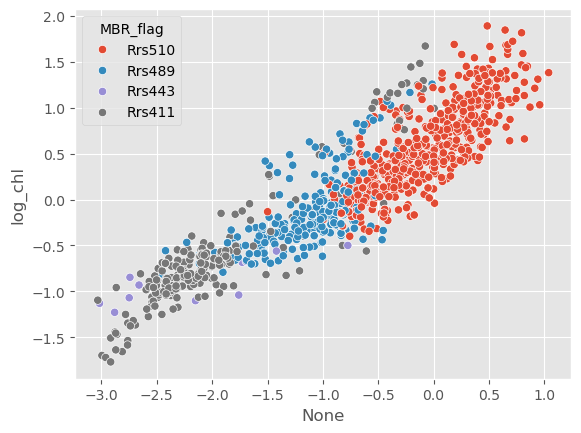

In [74]:
sb.scatterplot(
    x=np.log10(df.dropna().Rrs555*df.Rrs670) - np.log10(df.dropna().Rrs489*df.dropna().Rrs443), 
    y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

In [113]:
df.head().T.to_clipboard()

In [116]:
df.dropna().describe()

id          lat          lon       etopo2        oisst  \
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000   
mean   4711.830948    27.149032   -77.656618   699.747764    21.643623   
std    2373.451597    17.926463    37.142377  1496.097339     7.257952   
min    1441.000000   -62.441000  -179.955000     0.000000     0.880000   
25%    2117.250000    26.347800   -88.013950     9.000000    15.812500   
50%    3901.000000    29.348450   -82.472650    31.000000    24.520000   
75%    7076.750000    37.849875   -70.344375   187.000000    27.820000   
max    7831.000000    44.015000   178.867000  5707.000000    30.890000   

            Rrs411       Rrs443       Rrs489       Rrs510       Rrs555  \
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000   
mean      0.004657     0.004659     0.005341     0.005078     0.005110   
std       0.003900     0.003490     0.003904     0.004163     0.005116   
min       0.000051     0.000190     0.000367     0.000497     0.000417   
25%       0.002042     0.002379     0.003057     0.002862     0.001800   
50%       0.003377     0.003660     0.004600     0.003617     0.002990   
75%       0.006501     0.006200     0.006133     0.005600     0.006700   
max       0.030600     0.027601     0.030200     0.032900     0.046600   

            Rrs670          MBR      log_MBR          chl      log_chl  
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000  
mean      0.001454     1.759522     0.069529     3.723355     0.043136  
std       0.002309     1.926851     0.361026     7.444344     0.694293  
min       0.000000     0.310466    -0.507986     0.017000    -1.769551  
25%       0.000199     0.648066    -0.188381     0.301800    -0.520282  
50%       0.000560     0.922261    -0.035146     1.048150     0.020422  
75%       0.001800     1.741048     0.240808     3.267068     0.514157  
max       0.027700    12.445853     1.095025    77.864800     1.891341

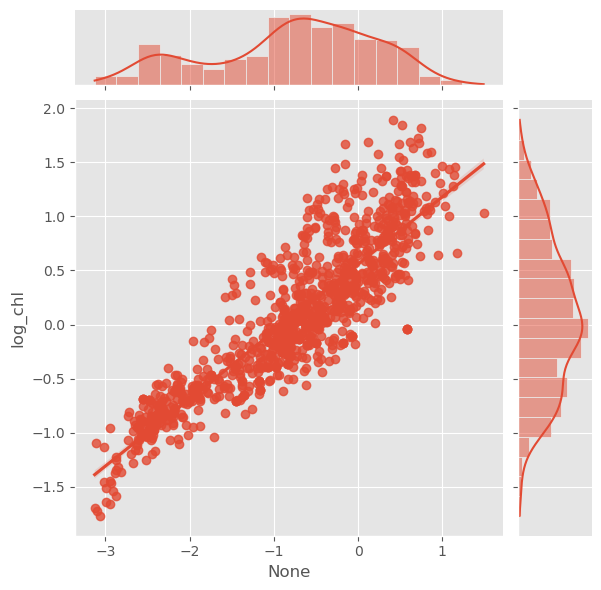

In [18]:
data = df.loc[df.MBR_flag=='Rrs411']
sb.jointplot(
    x=np.log10(
        (df.dropna().Rrs670)/df.dropna().Rrs411) + np.log10(df.dropna().Rrs555/df.dropna().Rrs489), 
    y=df.dropna().log_chl, #hue='MBR_flag', 
        #joint_kws={'alpha': 0.6, 'edgecolor': 'k'},    # dropna=True, 
       kind='reg'
    )

In [125]:
df.loc[df.Rrs670==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 157 to 1157
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         36 non-null     int64  
 1   lat        36 non-null     float64
 2   lon        36 non-null     float64
 3   etopo2     36 non-null     float64
 4   oisst      36 non-null     float64
 5   Rrs411     36 non-null     float64
 6   Rrs443     36 non-null     float64
 7   Rrs489     36 non-null     float64
 8   Rrs510     36 non-null     float64
 9   Rrs555     36 non-null     float64
 10  Rrs670     36 non-null     float64
 11  MBR        36 non-null     float64
 12  log_MBR    36 non-null     float64
 13  MBR_flag   36 non-null     object 
 14  chl        36 non-null     float64
 15  log_chl    36 non-null     float64
 16  hplc_flag  36 non-null     object 
dtypes: float64(14), int64(1), object(2)
memory usage: 5.1+ KB


<Axes: xlabel='None', ylabel='log_chl'>

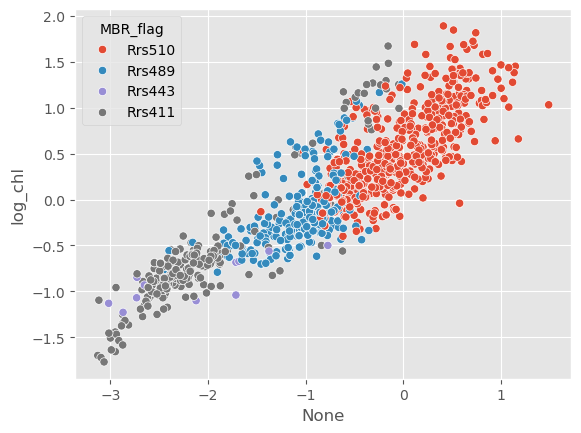

In [19]:
sb.scatterplot(
    x=np.log10(
        (df.dropna().Rrs670)/df.dropna().Rrs411) + np.log10(df.dropna().Rrs555/df.dropna().Rrs489), 
        y=df.dropna().log_chl, 
    hue=df.dropna().MBR_flag)

In [ ]:
mr = df.filter(like='Rrs').idxmax(axis=1,)

<Axes: xlabel='None', ylabel='log_chl'>

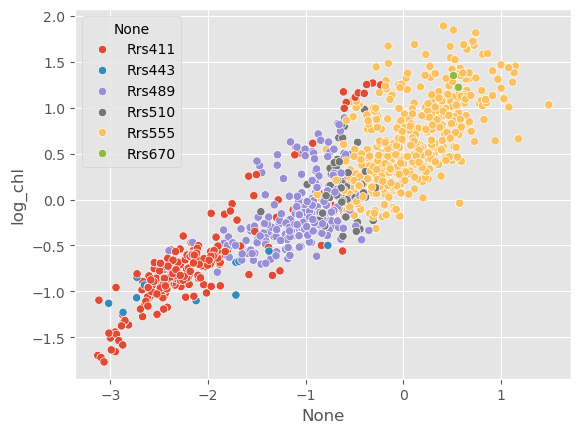

In [34]:
sb.scatterplot(
    x=np.log10(
        (df.dropna().Rrs670)/df.dropna().Rrs411) + np.log10(df.dropna().Rrs555/df.dropna().Rrs489), 
        y=df.dropna().log_chl, 
    hue=mr, hue_order=[f'Rrs{i}' for i in λ])

In [39]:
l = [411, 443, 489, 510]
[f'Rrs{li}' for li in l]
mr3 = df[[f'Rrs{li}' for li in l]].max(axis=1)

In [44]:
np.log10(df.Rrs670).info()

<class 'pandas.core.series.Series'>
Index: 1082 entries, 0 to 1212
Series name: Rrs670
Non-Null Count  Dtype  
--------------  -----  
1082 non-null   float64
dtypes: float64(1)
memory usage: 16.9 KB


In [53]:
l = [411, 443, 489, 510, 555]
[f'Rrs{li}' for li in l]
mr2 = df[[f'Rrs{li}' for li in l]].idxmax(axis=1)

<Axes: xlabel='None', ylabel='log_chl'>

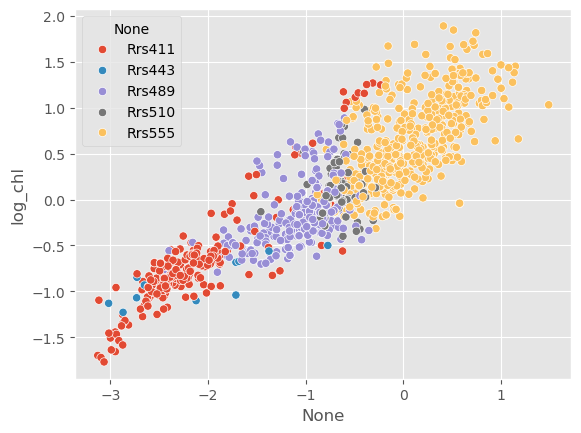

In [54]:
sb.scatterplot(
    x=np.log10(
        (df.dropna().Rrs670)/df.dropna().Rrs411) + np.log10(df.dropna().Rrs555/df.dropna().Rrs489), 
        y=df.dropna().log_chl, 
    hue=mr2, hue_order=[f'Rrs{i}' for i in l])

### Why high Rrs411 numbers at high levels of chl:
1. Rrs at 411 being “high” doesn't necessarily mean low absorption at that wavelength—it could also reflect increased backscattering, sun angle, or differences in inelastic scattering (e.g., Raman, fluorescence) that are stronger in the UV/blue.
2. Possible CDOM or detrital shielding effects
In case-2 waters, CDOM and non-algal particles (NAP) can absorb strongly at shorter wavelengths, but not always in the way that tracks chlorophyll.

In some CDOM-heavy waters, absorption at 443 or 489 can actually exceed that at 411, especially if CDOM slope ($S_{CDOM}$) is steep. This is atypical but possible.

Additionally, NAP may scatter more efficiently in the blue, potentially increasing backscattered radiance at 411 relative to longer blue wavelengths.

So you could get:

* High backscatter at 411 due to particles,
* Sharp absorption at 443/489 due to CDOM,
* Result: Rrs₄₁₁ > Rrs₄₄₃,₄₈₉,₅₁₀, even if chlorophyll is high.

In [31]:
mr.value_counts()

Rrs555    477
Rrs489    268
Rrs411    241
Rrs510     82
Rrs443     12
Rrs670      2
Name: count, dtype: int64

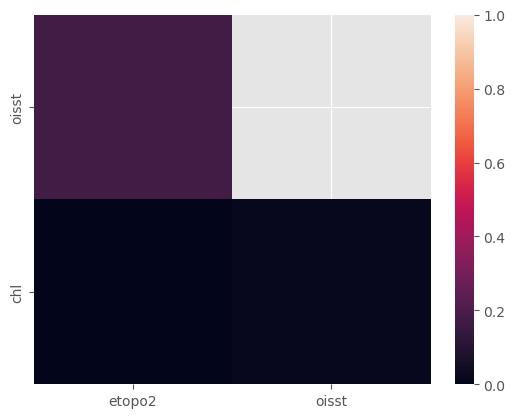

In [45]:
color_corr = df[geophys_features + [chl_features[0]]].corr()
plot_triu_heatmap(color_corr, vmin=0, vmax=1)

<Axes: >

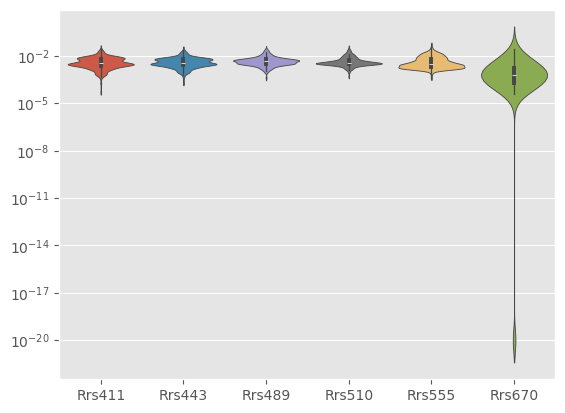

In [41]:
sb.violinplot(df.filter(regex='Rrs[0-9]+')+ 1e-20,log_scale=True)

In [54]:
df.hplc_flag.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4459 entries, 0 to 4458
Series name: hplc_flag
Non-Null Count  Dtype 
--------------  ----- 
4459 non-null   object
dtypes: object(1)
memory usage: 35.0+ KB


In [97]:
df_ = df[df.Rrs670>0].dropna()

In [98]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 4458
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1016 non-null   int64  
 1   Rrs411     1016 non-null   float64
 2   Rrs443     1016 non-null   float64
 3   Rrs489     1016 non-null   float64
 4   Rrs510     1016 non-null   float64
 5   Rrs555     1016 non-null   float64
 6   Rrs670     1016 non-null   float64
 7   chl        1016 non-null   float64
 8   hplc_flag  1016 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 79.4+ KB


In [99]:
df_log = np.log(df_.filter(regex='Rrs[0-9]'))
df_log['chl'] = np.log(df_.chl)
df_log['hplc_flag'] = df_.hplc_flag

In [ ]:
df_log.rename(columns={'chl': 'log_chl'}, inplace=True)
df_log.rename(columns ={f'Rrs{i}': f'log_rrs{i}' for i in [411, 443, 489, 510, 555, 670]}, inplace=True)

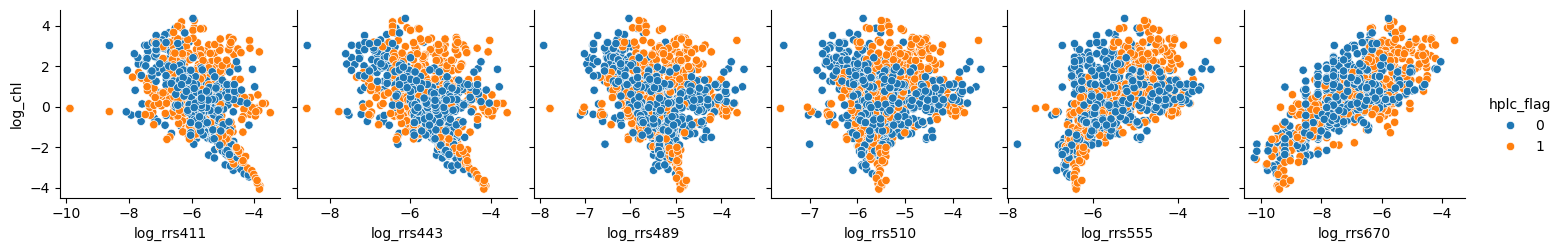

In [109]:
sb.pairplot(df_log, x_vars=[f'log_rrs{i}' for i in [411, 443, 489, 510, 555, 670]], y_vars='log_chl', hue='hplc_flag');

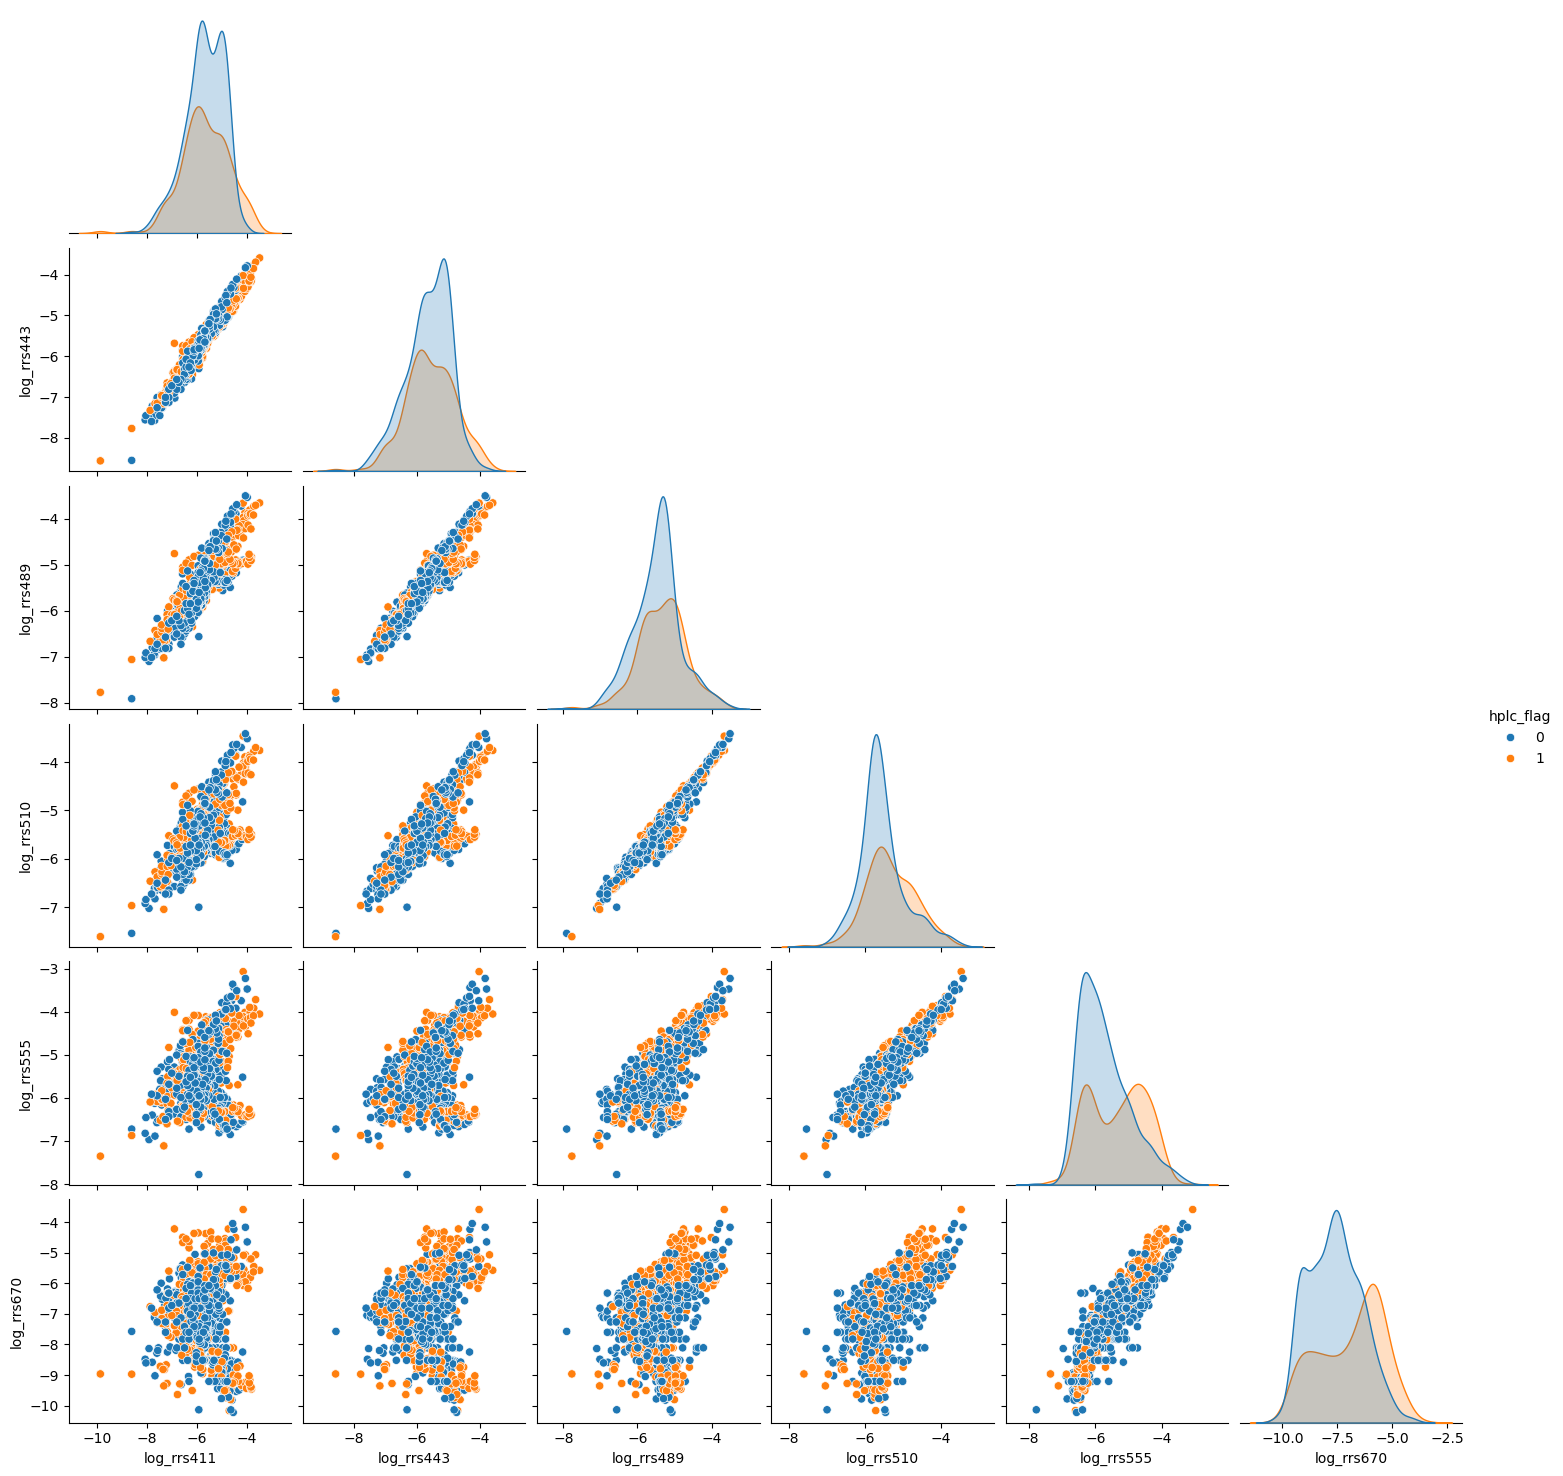

In [112]:
sb.pairplot(df_log, vars=[f'log_rrs{i}' for i in [411, 443, 489, 510, 555, 670]], hue='hplc_flag', corner=True)

In [110]:
df_log.to_parquet(project_path / 'data/04_transformed/df_log.pqt')

In [103]:
df_.to_parquet(project_path / 'data/04_transformed/df_ready4log.pqt')

<Axes: ylabel='chl'>

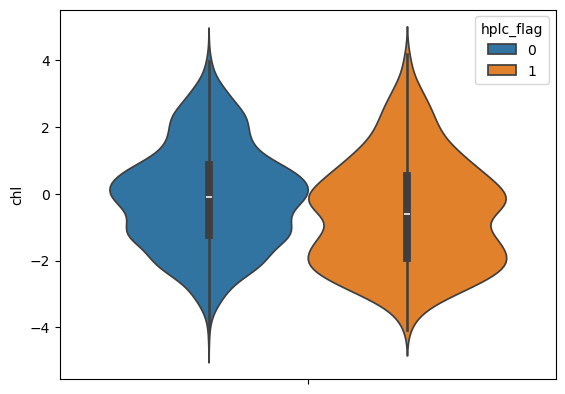

In [85]:

sb.violinplot(
    data=df_log[df_log.hplc_flag.astype('int') >=0], 
    y='chl', hue='hplc_flag')


/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/erdemkarakoylu/miniconda3/envs/pymc_base/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


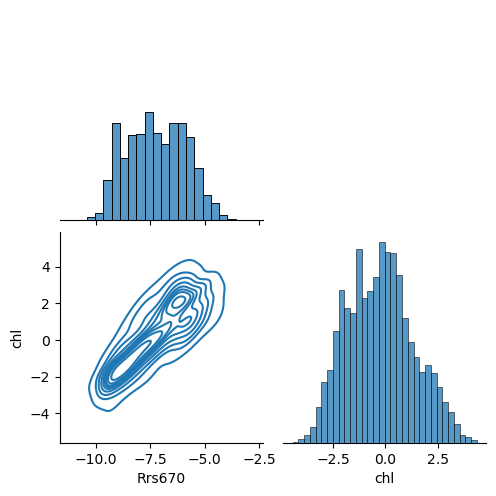

In [ ]:
sb.pairplot(np.log(df[['Rrs670', 'chl']]), corner=True, kind='kde', diag_kind='hist',);

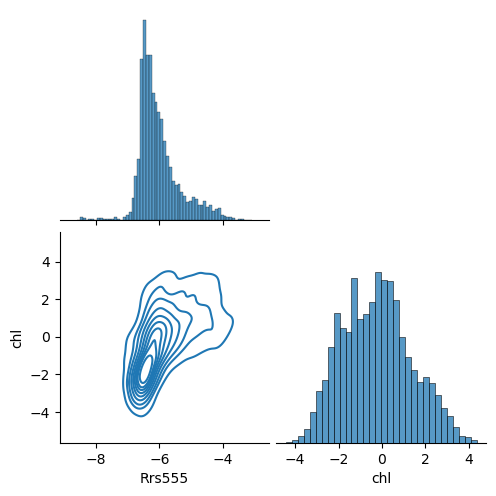

In [75]:
sb.pairplot(np.log(df[['Rrs555', 'chl']]), corner=True, kind='kde', diag_kind='hist');

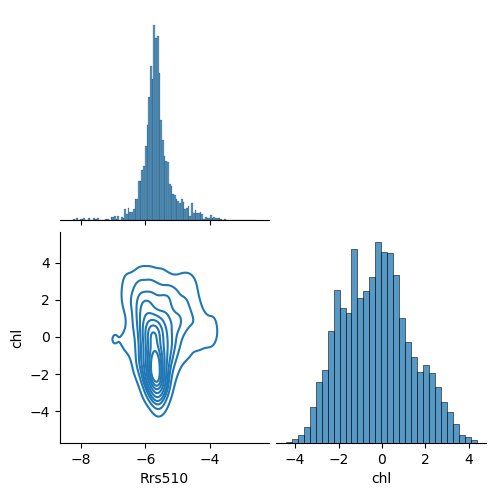

In [76]:
sb.pairplot(np.log(df[['Rrs510', 'chl']]), corner=True, kind='kde', diag_kind='hist');

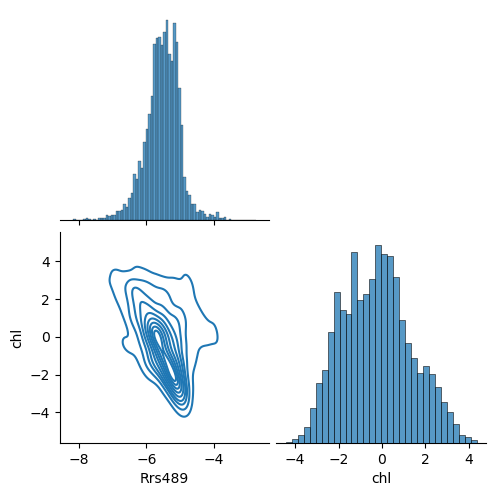

In [77]:
sb.pairplot(np.log(df[['Rrs489', 'chl']]), corner=True, kind='kde', diag_kind='hist');

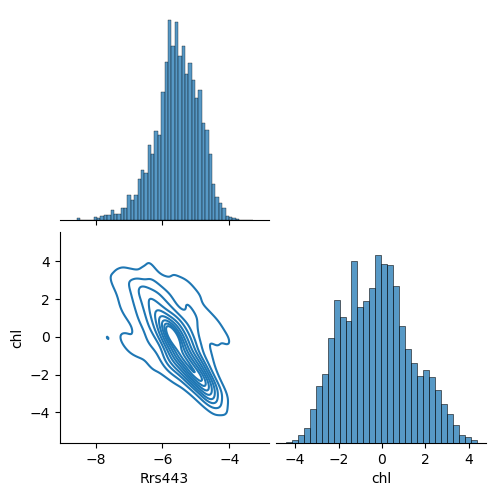

In [78]:
sb.pairplot(np.log(df[['Rrs443', 'chl']]), corner=True, kind='kde', diag_kind='hist');

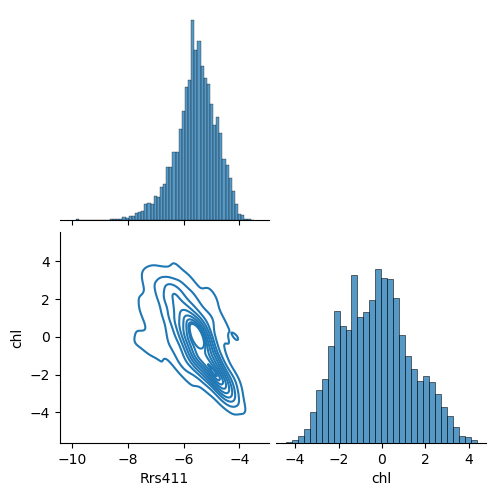

In [80]:
sb.pairplot(np.log(df[['Rrs411', 'chl']]), corner=True, kind='kde', diag_kind='hist');

In [ ]:
sb.pairplot(np.log(df[['Rrs411', 'chl', 'hplc_flag']]), vars=corner=True, kind='kde', diag_kind='hist', hue=);

count    4127.000000
mean        2.680228
std         5.758436
min         0.012000
25%         0.233325
50%         0.764000
75%         2.150000
max        77.864800
Name: chl, dtype: float64